# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [19]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [20]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [28]:
# create a data frame from city, lat, lng, temp, cloudiness, country, date, humidity, max temp and wind speed.
weather_dict = pd.DataFrame(columns = [
    "City",
    "Lat",
    "Lng",
    "temp",
    "Cloudiness",
    "Country",
    "Date",
    "Humidity",
    "Max Temp",
    "Wind Speed"
    
])
weather_dict

,City,Lat,Lng,temp,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&appid='+ weather_api_key
city_list = []
for city in cities:
    url = base_url + "&q=" + city
    city_json = requests.get(url).json()
    try:
        print(city)
        latitude= city_json['coord']['lat']
        Longitude= city_json['coord']['lon']
        Temperature= city_json['main']['temp_max']
        Cloudiness = city_json['clouds']['all']
        Country = city_json['sys']['country']
        Date = city_json['dt']
        Humidity = city_json['main']['humidity']
        Max_Temp = city_json['main']['temp_max']
        Wind_speed = city_json['wind']['speed']
        city_list.append({"City": city,
    "Lat": latitude,
    "Lng":Longitude,
    "temp":Temperature,
    "Cloudiness": Cloudiness,
    "Country": Country,
    "Date": Date,
    "Humidity": Humidity,
    "Max Temp": Max_Temp,
    "Wind Speed": Wind_speed
                         })
    except:
        print("couldn't find "+ city)
print("finished")
city_df = pd.DataFrame (city_list)
city_df

boa vista
saldanha
jamestown
albany
hilo
kattivakkam
taolanaro
couldn't find taolanaro
sapao
couldn't find sapao
barrow
ixtapa
constitucion
ushuaia
mount gambier
rikitea
junction city
san martin
oriximina
mataura
tasiilaq
ponta delgada
selma
ippy
buqayq
couldn't find buqayq
bluff
olafsvik
hobart
cherskiy
kasama
cape town
mar del plata
kahului
vaini
vaitupu
couldn't find vaitupu
buraydah
pemba
ust-nera
butaritari
port lincoln
hoi an
lazaro cardenas
cenade
muros
salalah
sahrak
couldn't find sahrak
buala
quatre cocos
saint-philippe
ust-ilimsk
katsuura
illoqqortoormiut
couldn't find illoqqortoormiut
arraial do cabo
broome
saskylakh
comodoro rivadavia
kalat
kathu
thompson
lompoc
cockburn harbour
couldn't find cockburn harbour
ilulissat
ahuimanu
gazli
bengkulu
geraldton
port elizabeth
sao joao da barra
naze
castro
severo-kurilsk
luderitz
puerto ayora
ponta do sol
faya
souillac
luganville
at-bashi
daxian
couldn't find daxian
cabo san lucas
grand river south east
couldn't find grand river sout

,City,Lat,Lng,temp,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,boa vista,2.82,-60.67,80.60,75,BR,1592438482,83,80.60,2.24
1,saldanha,-33.01,17.94,50.00,11,ZA,1592438644,71,50.00,3.36
2,jamestown,42.10,-79.24,78.80,1,US,1592438529,41,78.80,11.41
3,albany,42.60,-73.97,82.00,0,US,1592438644,47,82.00,1.88
4,hilo,19.73,-155.09,84.20,1,US,1592438640,54,84.20,8.05
...,...,...,...,...,...,...,...,...,...,...
542,karpathos,35.51,27.21,70.77,1,GR,1592438727,83,70.77,12.10
543,roebourne,-20.78,117.13,72.48,0,AU,1592438727,47,72.48,5.37
544,santa fe,-31.63,-60.70,75.00,100,AR,1592438727,67,75.00,8.01
545,san jose,37.34,-121.89,87.01,1,US,1592438464,16,87.01,16.11


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [57]:
city_df = pd.DataFrame (city_list)
city_df.to_csv("output_data/output.csv")
city_df.count()


City          547
Lat           547
Lng           547
temp          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Max Temp      547
Wind Speed    547
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
city_df.describe()

,Lat,Lng,temp,Cloudiness,Date,Humidity,Max Temp,Wind Speed
count,547.000000,547.000000,547.000000,547.000000,5.470000e+02,547.000000,547.000000,547.000000
mean,19.966673,23.047441,67.472066,47.848263,1.592439e+09,69.820841,67.472066,7.802596
std,33.181818,89.557244,14.028525,37.010107,7.691177e+01,21.036530,14.028525,5.171606
min,-54.800000,-175.200000,28.400000,0.000000,1.592438e+09,1.000000,28.400000,0.090000
25%,-7.560000,-58.285000,58.025000,9.500000,1.592439e+09,59.000000,58.025000,3.370000
50%,22.290000,24.730000,69.800000,45.000000,1.592439e+09,75.000000,69.800000,6.930000
75%,47.525000,102.585000,78.970000,81.500000,1.592439e+09,85.000000,78.970000,10.780000
max,78.220000,179.320000,98.780000,100.000000,1.592439e+09,100.000000,98.780000,31.270000


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

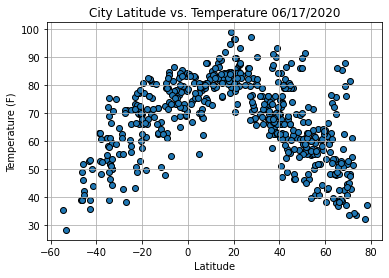

In [51]:
#Make scatter plot for Latitude vs Temperature
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title(f'City Latitude vs. Temperature {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

#Save image
plt.savefig("output_data/lat_temp.png")
plt.show()


## Latitude vs. Humidity Plot

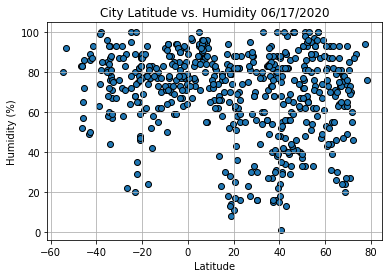

In [53]:
#Make scatter plot for Latitude vs Humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save image
plt.savefig("output_data/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

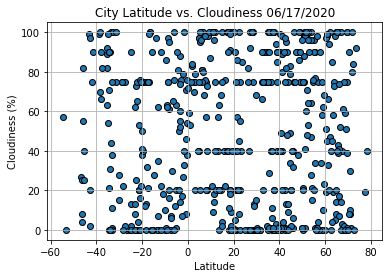

In [54]:
#Make scatter plot for Latitude vs Cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save image
plt.savefig("output_data/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

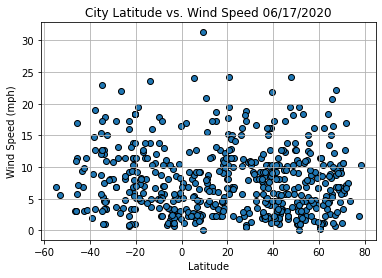

In [56]:
#Make scatter plot for Latitude vs Wind Speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save image
plt.savefig("output_data/lat_wind.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8271188905041935


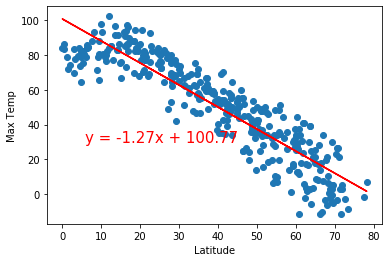

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.39936284758885965


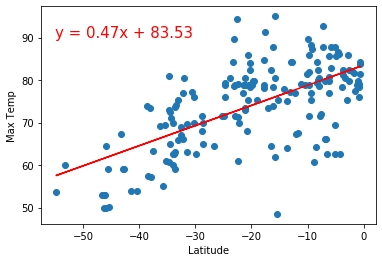

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10829462153873139


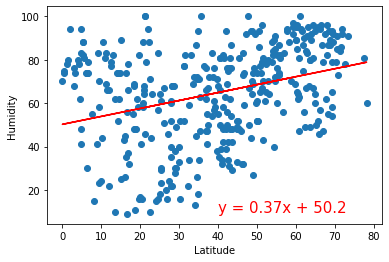

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008996079328825663


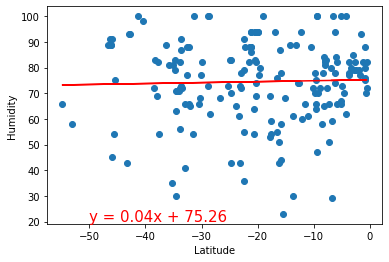

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


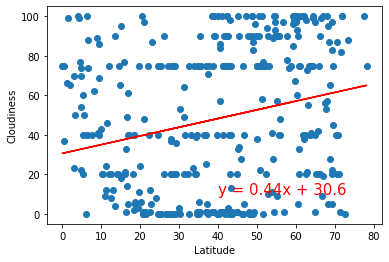

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


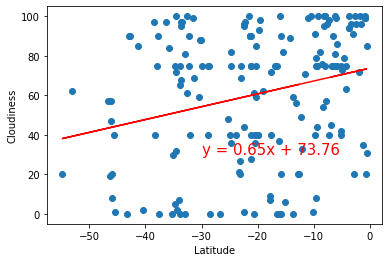

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


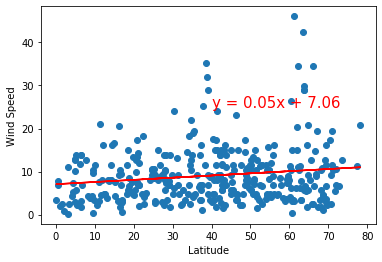

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


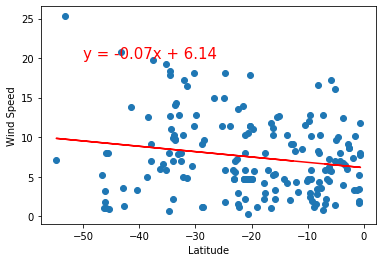